<h1> It's Lit. An Extensive Study Of Young People </h1>
<h2> <strong> Authors: </strong> <h2>
<ul class="task-list">
<li>Jessica Tsoi</li>
<li>Matthew Lee</li>
<li>Benjamin Mok</li>
<li>Eugene Hong</li>
</ul>

Lets start by importing some of the things we need.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
plt.style.use('ggplot')

<strong> Note: </strong> We will be using matplotlib version 1.5.3

In [2]:
import matplotlib
matplotlib.__version__

'1.5.3'

Our dataset comes from the following: https://www.kaggle.com/miroslavsabo/young-people-survey

We will import the CSV dataset into a pandas Dataframe. We will call it, y_data.

In [3]:
y_data = pd.read_csv('responses.csv')
y_data.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


Lets take a look at the size of the dataset.

In [4]:
print y_data.shape
print y_data.Music.unique()

(1010, 150)
[  5.   4.   1.   3.   2.  nan]


We note that the data's numerical response are 1 to 5, representing how much they agree on a particular statement. 1 being strongly disagree to 5 being strong agree. We will set a list called onefive that states these answers for our future graphical usage.

In [5]:
onefive = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree']

# Spending between Females and Males

When it comes to a target age demographic, there is no age group more coveted than “young people,” i.e. people between the ages of 18-30. In this portion of our report we will narrow down our large dataset by focusing on a simple group of people a company may want to advertise and sell to . Let’s start with the most broad division, gender. As individuals in our society, we may be able to make stereotypical guesses on which gender may spend more on clothing, health, technology, etc., but, further research is needed to confirm this. 

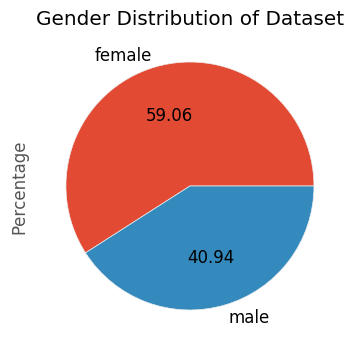

In [6]:
y_data['Gender'].value_counts().plot.pie(labels = ['female','male'], autopct = '%.2f', fontsize = 12, figsize = (4,4))
plt.ylabel('Percentage')
plt.title('Gender Distribution of Dataset')
plt.show()

Before we begin, let’s take a look at the distribution of females and males within in our dataset. From the pie chart above, we can see that 59% of our subjects are female and about 41% are males. 

<h3> Data Preparation </h3>

Since we are comparing the Females and Males within our dataset, we will subset the females and males into their individual dataset. Furthermore, we will be using the following columns:

<ul class="task-list">
<li>I take my time to make decision. - 'Decision making'</li>
<li>I try to give as much as I can to other people at Christmas. - 'Giving'</li>
<li>I always give to charity. - 'Charity'</li>
<li>I save all the money I can. - 'Finances'</li>
<li>I prefer branded clothing to non branded. - 'Branded clothing'</li>
<li>I spend a lot of money on  partying and socializing. - 'Entertainment spending'</li>
<li>I spend a lot of money on my appearance. - 'Spending on looks'</li>
<li>I spend a lot of money on gadgets. - 'Spending on gadgets'</li>
<li>I will hapilly pay more money for good, quality or healthy food. - 'Spending on healthy eating'</li>
</ul>


In [7]:
f_data = y_data[y_data['Gender'] == 'female'][["Decision making", "Giving", "Charity", "Finances", "Branded clothing", "Entertainment spending", "Spending on looks", "Spending on gadgets", "Spending on healthy eating"]]
f_data.shape

(593, 9)

In [8]:
m_data = y_data[y_data['Gender'] == 'male'][["Decision making", "Giving", "Charity", "Finances", "Branded clothing", "Entertainment spending", "Spending on looks", "Spending on gadgets", "Spending on healthy eating"]]
m_data.shape

(411, 9)

In [9]:
f_total = f_data.count()
print f_total

Decision making               592
Giving                        589
Charity                       593
Finances                      591
Branded clothing              591
Entertainment spending        592
Spending on looks             592
Spending on gadgets           593
Spending on healthy eating    592
dtype: int64


In [10]:
m_total = m_data.count()
print m_total

Decision making               409
Giving                        409
Charity                       408
Finances                      410
Branded clothing              411
Entertainment spending        409
Spending on looks             409
Spending on gadgets           411
Spending on healthy eating    410
dtype: int64


As we can see from the above female data count and male data count, we have different numbers (frequency) for each columns and there are more females than males (as we stated in the above pie chart too). Therefore, to properly compare the female and male data, we have to convert the count to percentages.

First, we will create study_col, a new dataframe that will consist the total number of each response from onefive (onefive = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree']) in each column.

In [11]:
study_col = list(f_data)
f_study = pd.DataFrame(0, index = xrange(1,6) ,columns = study_col)
m_study = pd.DataFrame(0, index = xrange(1,6) ,columns = study_col)

We will iterrate through both the female data and male data. We will add 1 to the column of the question it asks (and it belongs to) and the number of onefive that it responded will be the row index

In [12]:
for index, row in f_data.iterrows():
    for y in study_col:
        try:
            f_study.loc[row[y],y] += 1
        except:
            continue

In [13]:
for index, row in m_data.iterrows():
    for y in study_col:
        try:
            m_study.loc[row[y],y] += 1
        except:
            continue

Lets take a preview at our newly created dataframe.

In [14]:
m_study.head()

,Decision making,Giving,Charity,Finances,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating
1,34,89,156,60,55,19,55,36,16
2,90,97,120,76,50,71,101,79,54
3,152,127,95,137,99,109,118,112,116
4,76,60,30,102,122,125,88,97,132
5,57,36,7,35,85,85,47,87,92


Taking the column Decision making, we see that we have totaled up the respective one to five responses. However, this is not what we want to plot with. We want to plot with percentages, so we will convert each column's response to a percentage based on each column's total response.


Next, we created a function that will convert each column into it's percentage. This will use f_total and m_total from above that have the total amount of each column.

In [15]:
def gender_study(df_s, df_t, x , y):
    """Input: df_s, dataframe, the dataframe that contains the total response count.
              df_t, list, the list that contains each column's total count.
              x, variable, the index of df_s to convert to a percentage
              y, variable, the index of df_s and df_t to convert to a percentage
              
       Function: Convert the x,y element of df_s to a percentage.
       
       Output: Nothing. Since python's parameter is a pointer, the pointer of df_s already changes the actual dataframe.
    """
    df_s.loc[x,y] = float(df_s.loc[x,y])/df_t[y]
    return None

In [16]:
[gender_study(f_study, f_total, x,y) for x in xrange(1,6) for y in study_col]
f_study

,Decision making,Giving,Charity,Finances,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating
1,0.082770,0.134126,0.333895,0.109983,0.201354,0.119932,0.092905,0.215852,0.042230
2,0.187500,0.168081,0.298482,0.160745,0.172589,0.204392,0.175676,0.310287,0.131757
3,0.314189,0.285229,0.284992,0.370558,0.306261,0.341216,0.302365,0.244519,0.278716
4,0.192568,0.191851,0.055649,0.252115,0.199662,0.201014,0.265203,0.134907,0.329392
5,0.222973,0.220713,0.026981,0.106599,0.120135,0.133446,0.163851,0.094435,0.217905


In [17]:
[gender_study(m_study, m_total, x,y) for x in xrange(1,6) for y in study_col]
m_study

,Decision making,Giving,Charity,Finances,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating
1,0.083130,0.217604,0.382353,0.146341,0.133820,0.046455,0.134474,0.087591,0.039024
2,0.220049,0.237164,0.294118,0.185366,0.121655,0.173594,0.246944,0.192214,0.131707
3,0.371638,0.310513,0.232843,0.334146,0.240876,0.266504,0.288509,0.272506,0.282927
4,0.185819,0.146699,0.073529,0.248780,0.296837,0.305623,0.215159,0.236010,0.321951
5,0.139364,0.088020,0.017157,0.085366,0.206813,0.207824,0.114914,0.211679,0.224390


Lets confirm we did this right. If we sum up all each columns in f_study and m_study, it should sum up to 1.

In [18]:
f_study.sum()

Decision making               1.0
Giving                        1.0
Charity                       1.0
Finances                      1.0
Branded clothing              1.0
Entertainment spending        1.0
Spending on looks             1.0
Spending on gadgets           1.0
Spending on healthy eating    1.0
dtype: float64

In [19]:
m_study.sum()

Decision making               1.0
Giving                        1.0
Charity                       1.0
Finances                      1.0
Branded clothing              1.0
Entertainment spending        1.0
Spending on looks             1.0
Spending on gadgets           1.0
Spending on healthy eating    1.0
dtype: float64

Confirm the data is converted to percentage since all of the data adds up to 1.
Now we are ready to analyze and plot.

## Young People and Saving Money

And before we dive into the spending of young people, let’s see how we can potentially find ways to help them save money.The opinions on saving as much money as possible are plotted, showing us how the opinions of males and females are fairly similar.

Since all our column's numeric response are between 1 to 5, we will set up the following for our plots:

Also, we will be ploting a side by side bar plot to show the different between female and male and have individual pie charts to show the distribution within the female and male dataset.

In [20]:
bar_width = 0.3
bar_locations = np.arange(1,6)

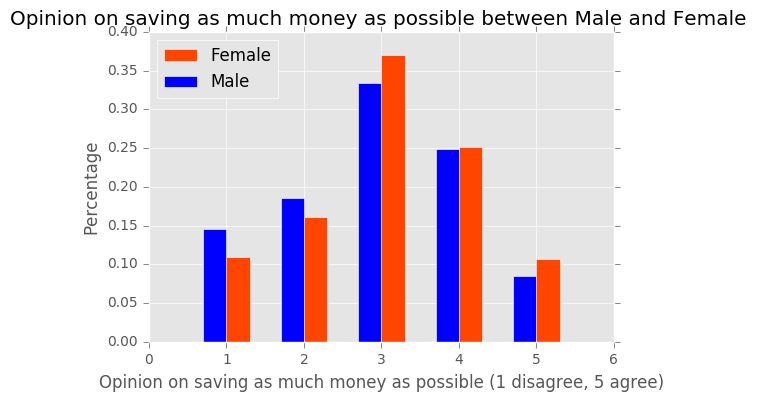

In [21]:
plt.bar(bar_locations, f_study['Finances'], bar_width, color = 'orangered', label = 'Female')
plt.bar(bar_locations - bar_width, m_study['Finances'], bar_width, color='b', label = 'Male')
plt.legend(["Female", "Male"], loc = 'upper left')
plt.xlabel('Opinion on saving as much money as possible (1 disagree, 5 agree)')
plt.ylabel('Percentage')
plt.title('Opinion on saving as much money as possible between Male and Female ')
plt.show()

However, if we are to look at the individual percentages of responses between males and females,below, we see that 35.87% of females and 33.42% agree or strongly agree with saving as much money as possible. That’s roughy one third of of each gender group. We can then take this information and advise banks to target both females and males equally because it appears that among young people, a good portion of each gender feels the need to save money.

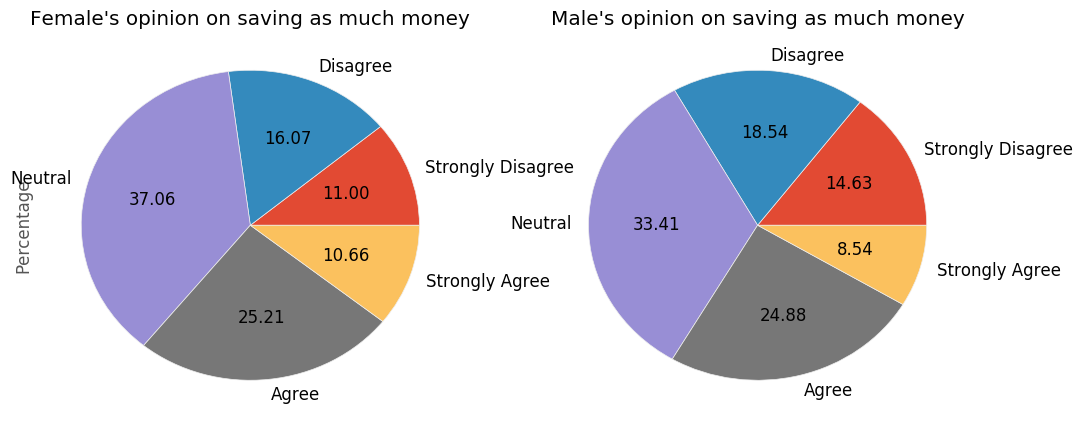

In [22]:
plt.subplot(1,2,1)
f_study['Finances'].plot.pie(labels = onefive, autopct = '%.2f', fontsize = 12, figsize = (12,5))
plt.ylabel('Percentage')
plt.title('Female\'s opinion on saving as much money')
plt.subplot(1,2,2)
m_study['Finances'].plot.pie(labels = onefive, autopct = '%.2f', fontsize = 12, figsize = (12,5))
plt.ylabel('')
plt.title('Male\'s opinion on saving as much money')
plt.show()

## Decision Making Opinions of Each Gender

Now let’s delve into something that may not be intuitively related to spending - decision making. For our purposes, since our data is in a categorical format, we will be mainly focusing on responses that are “agree” and “strongly agree.” From he bar graph below, we can see that females agree more strongly on the need to take time when making decisions. 

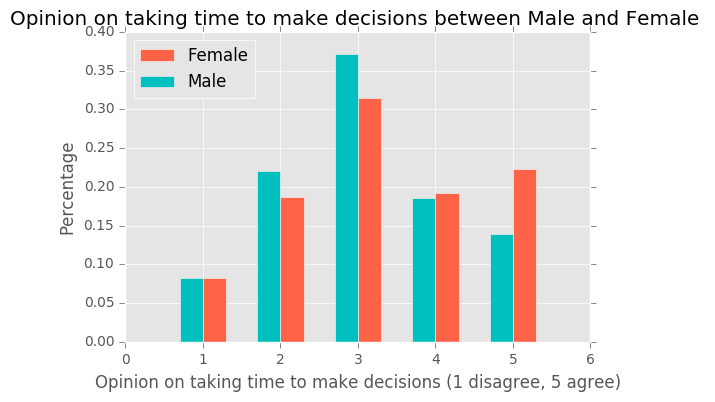

In [23]:
plt.bar(bar_locations, f_study['Decision making'], bar_width, color = 'tomato', label = 'Female')
plt.bar(bar_locations - bar_width, m_study['Decision making'], bar_width, color='c', label = 'Male')
plt.legend(["Female", "Male"], loc = 'upper left')
plt.xlabel('Opinion on taking time to make decisions (1 disagree, 5 agree)')
plt.ylabel('Percentage')
plt.title('Opinion on taking time to make decisions between Male and Female ')
plt.show()

Further breakdown of the decisions in the pie charts below between each gender shows us that combined 41.56% of females agree or strongly agree on the need to take time when making a decision compared to 32.52% of males that agree or strongly agree. Now what can we do with this seemingly broad information? Well we can advise companies to target males with more time sensitive ads and promotions. Companies frequently email out promotions about how a sale or promotional code will be expiring soon, so one possible course of action is to target males with this kind of advertisement. Companies that sell men’s clothing in store can also be advised to hold shorter sales since the time sensitivity of the sales could encourage males to feel the urgency to purchase clothing. 

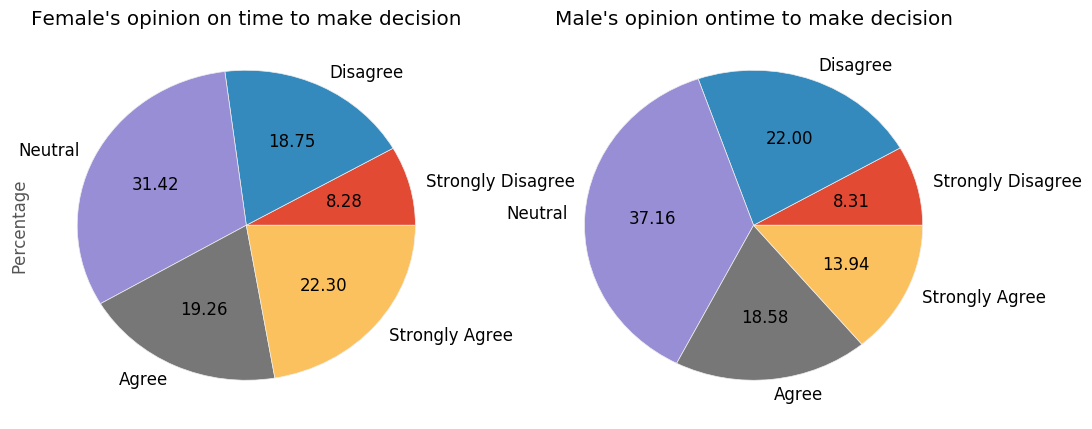

In [24]:
plt.subplot(1,2,1)
f_study['Decision making'].plot.pie(labels = onefive, autopct = '%.2f', fontsize = 12, figsize = (12,5))
plt.ylabel('Percentage')
plt.title('Female\'s opinion on time to make decision')
plt.subplot(1,2,2)
m_study['Decision making'].plot.pie(labels = onefive, autopct = '%.2f', fontsize = 12, figsize = (12,5))
plt.ylabel('')
plt.title('Male\'s opinion ontime to make decision')
plt.show()

## Young People and Their Opinions on Giving to Charity

Let’s now look at how young females and males feel about giving to charity. We frequently see ads on the side of the road and on television about giving to different charities such as animal shelters and the Salvation army, but how do young people potentially feel about them? From the figure below, it appears that most people do not have a high opinion on giving to charity. Most responses recorded have a negative response to always giving to charity.

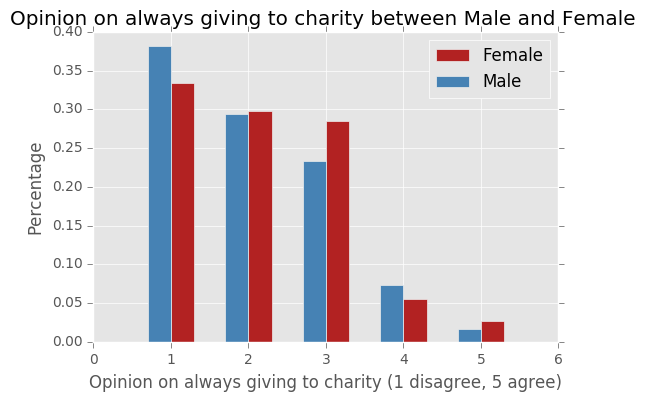

In [25]:
plt.bar(bar_locations, f_study['Charity'], bar_width, color = 'firebrick', label = 'Female')
plt.bar(bar_locations - bar_width, m_study['Charity'], bar_width, color='steelblue', label = 'Male')
plt.legend(["Female", "Male"], loc = 'upper right')
plt.xlabel('Opinion on always giving to charity (1 disagree, 5 agree)')
plt.ylabel('Percentage')
plt.title('Opinion on always giving to charity between Male and Female ')
plt.show()

Breaking this down by gender in below, both genders have a very similar opinion on always giving to charity. Less than 10% of each gender agrees or strongly agrees with giving to charity. Moving forward, we can advise charities to perhaps spend less on advertising to younger demographics and instead focus on building stronger relationships with current donors that are known to consistently donate. 

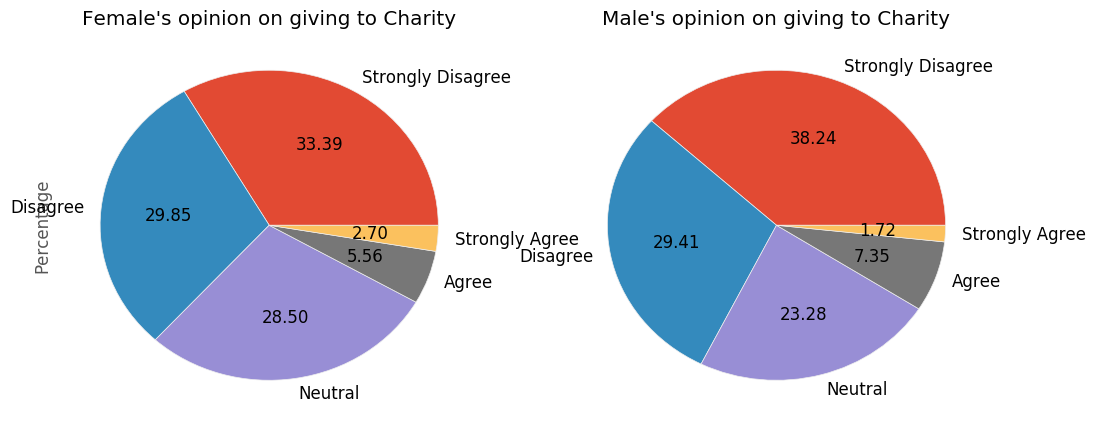

In [26]:
plt.subplot(1,2,1)
f_study['Charity'].plot.pie(labels = onefive, autopct = '%.2f', fontsize = 12, figsize = (12,5))
plt.ylabel('Percentage')
plt.title('Female\'s opinion on giving to Charity')
plt.subplot(1,2,2)
m_study['Charity'].plot.pie(labels = onefive, autopct = '%.2f', fontsize = 12, figsize = (12,5))
plt.ylabel('')
plt.title('Male\'s opinion on giving to Charity')
plt.show()

## Which Gender Spends More on Christmas Gifts?

Next, let’s look into holiday spending between females and males. From the bar graphs below, it appears that females have a stronger opinion of giving during Christmas compared to males.

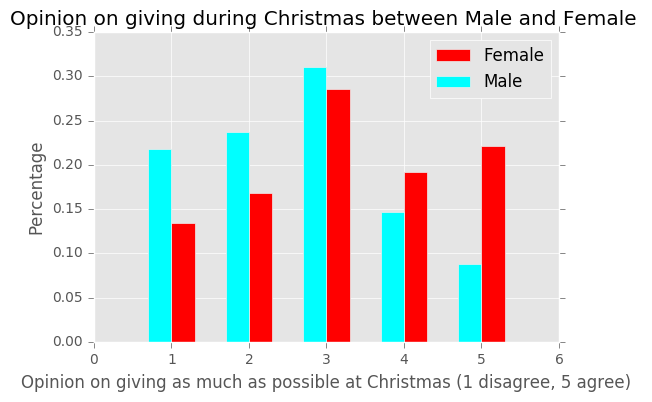

In [27]:
plt.bar(bar_locations, f_study['Giving'], bar_width, color = 'r', label = 'Female')
plt.bar(bar_locations - bar_width, m_study['Giving'], bar_width, color='aqua', label = 'Male')
plt.legend(["Female", "Male"], loc = 'upper right')
plt.xlabel('Opinion on giving as much as possible at Christmas (1 disagree, 5 agree)')
plt.ylabel('Percentage')
plt.title('Opinion on giving during Christmas between Male and Female ')
plt.show()

Breaking down this data by the percentage of responses for each gender below, we see that 41.26% of females agree or strongly agree with the need to give during Christmas, compared to 23.47% of men. From this, we can advise companies to have more female related promotions. Companies that have a larger female audience such as Sephora, Lulu Lemon, H&M can send more holiday ads and promotions to females through email, youtube ads, and in the mail.

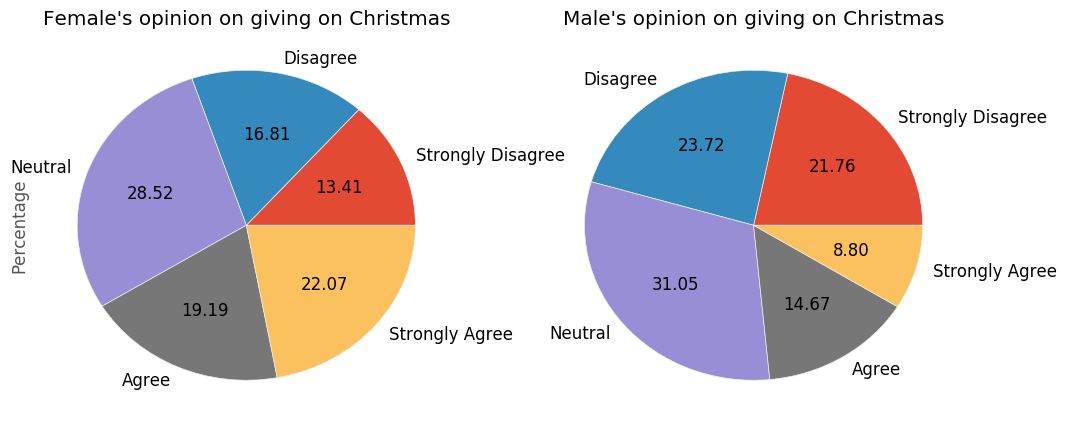

In [28]:
plt.subplot(1,2,1)
f_study['Giving'].plot.pie(labels = onefive, autopct = '%.2f', fontsize = 12, figsize = (12,5))
plt.ylabel('Percentage')
plt.title('Female\'s opinion on giving on Christmas')
plt.subplot(1,2,2)
m_study['Giving'].plot.pie(labels = onefive, autopct = '%.2f', fontsize = 12, figsize = (12,5))
plt.ylabel('')
plt.title('Male\'s opinion on giving on Christmas')
plt.show()

## Which Gender Spends More on Branded Clothing?

So what about clothing? Below, we see that males tend to have a higher of preference of branded clothing compared to females. 

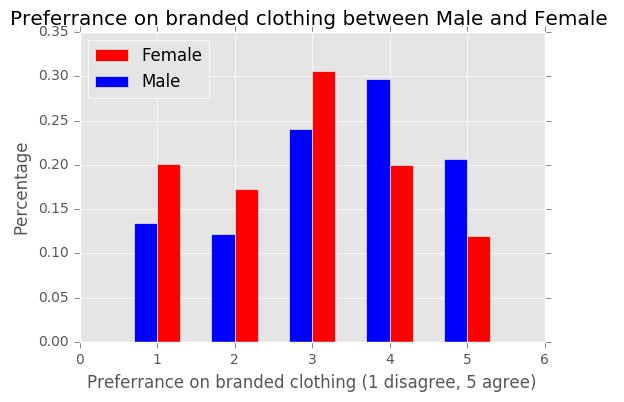

In [29]:
plt.bar(bar_locations, f_study['Branded clothing'], bar_width, color = 'r', label = 'Female')
plt.bar(bar_locations - bar_width, m_study['Branded clothing'], bar_width, color='b', label = 'Male')
plt.legend(["Female", "Male"], loc = 'upper left')
plt.xlabel('Preferrance on branded clothing (1 disagree, 5 agree)')
plt.ylabel('Percentage')
plt.title('Preferrance on branded clothing between Male and Female ')
plt.show()

We see from the percentages that 50.36% of females agree or strongly agree with spending on branded clothing compared to 31.98% of females. Knowing this, we can now advise higher end fashion labels to target males more than females when it comes to advertising. Furthermore, high end fashion labels can perhaps focus more on Men’s trends for a season or offer more promotions for men’s clothing.

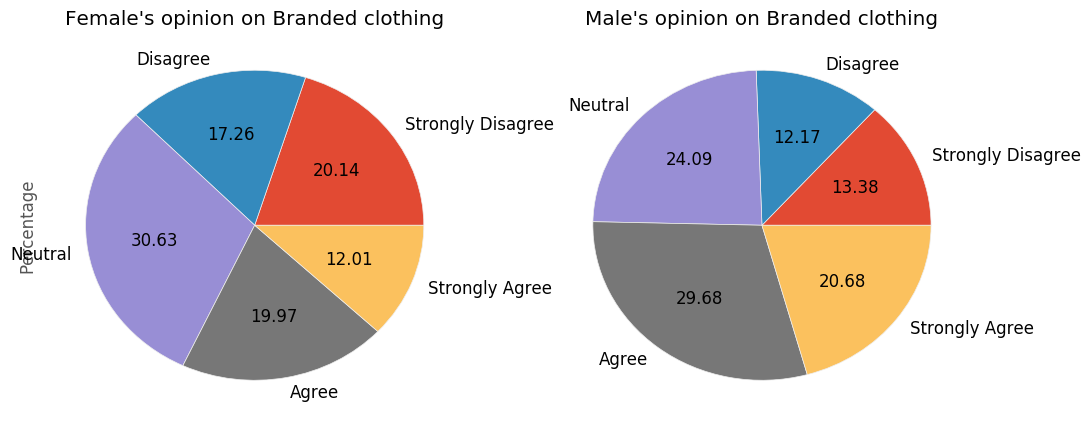

In [30]:
plt.subplot(1,2,1)
f_study['Branded clothing'].plot.pie(labels = onefive, autopct = '%.2f', fontsize = 12, figsize = (12,5))
plt.ylabel('Percentage')
plt.title('Female\'s opinion on Branded clothing')
plt.subplot(1,2,2)
m_study['Branded clothing'].plot.pie(labels = onefive, autopct = '%.2f', fontsize = 12, figsize = (12,5))
plt.ylabel('')
plt.title('Male\'s opinion on Branded clothing')
plt.show()

## Which Gender Spends More on Looks?

Now that we’ve covered clothing, one can’t help but wonder which gender might spend more on looks in general. The graph below shows us that it’s females that have a higher opinion on spending on looks. 

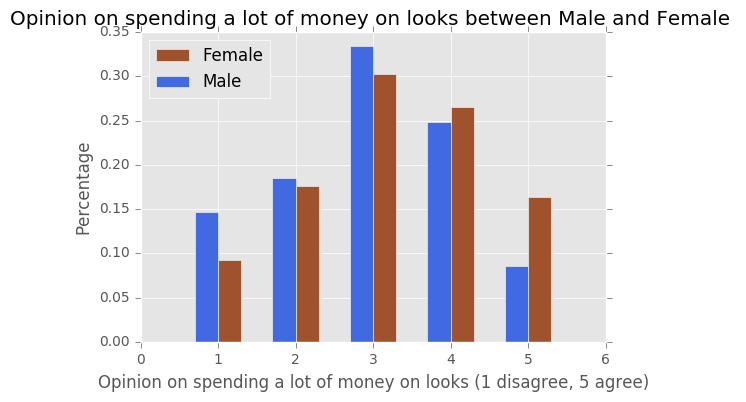

In [31]:
plt.bar(bar_locations, f_study['Spending on looks'], bar_width, color = 'sienna', label = 'Female')
plt.bar(bar_locations - bar_width, m_study['Finances'], bar_width, color='royalblue', label = 'Male')
plt.legend(["Female", "Male"], loc = 'upper left')
plt.xlabel('Opinion on spending a lot of money on looks (1 disagree, 5 agree)')
plt.ylabel('Percentage')
plt.title('Opinion on spending a lot of money on looks between Male and Female ')
plt.show()

To be more precise, according to the pie charts below, 42.91% of females compared to 33.01% of males agree or strongly agree with spending money on looks. This is something we may have already intuitively known from female stereotypes, but now that we have data on female spending on looks, we can advise skincare and makeup companies such as Kiehl’s, Sephora, Ulta, etc. to focus in on a female audience when it comes to advertisements. If we were to advise a skincare and makeup company further, one course of action could be to do further research on the current and upcoming trends in skincare and makeup. 

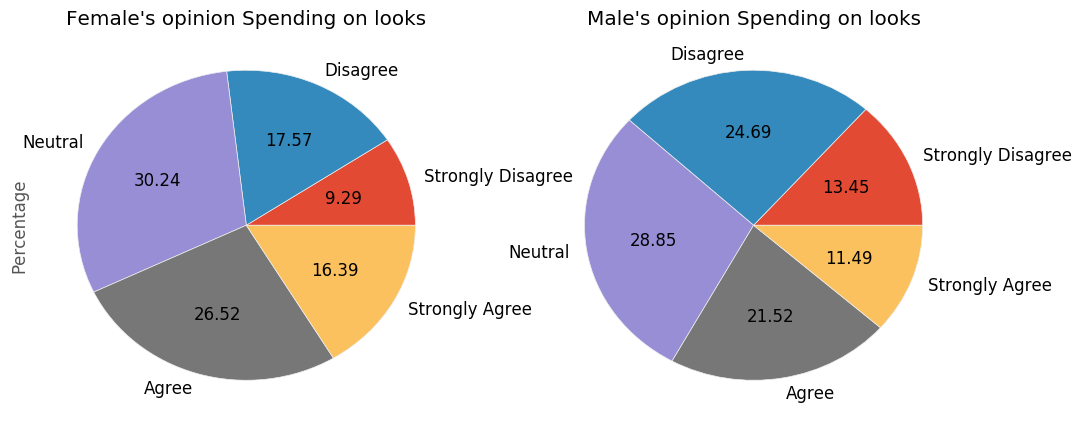

In [32]:
plt.subplot(1,2,1)
f_study['Spending on looks'].plot.pie(labels = onefive, autopct = '%.2f', fontsize = 12, figsize = (12,5))
plt.ylabel('Percentage')
plt.title('Female\'s opinion Spending on looks')
plt.subplot(1,2,2)
m_study['Spending on looks'].plot.pie(labels = onefive, autopct = '%.2f', fontsize = 12, figsize = (12,5))
plt.ylabel('')
plt.title('Male\'s opinion Spending on looks')
plt.show()

## Which Gender Spends More on Entertainment?

Transitioning to entertainment industry, let’s see which gender has a higher opinion of spending on entertainment. Below, we see that it seems it is males that hold a higher opinion on spending on entertainment.

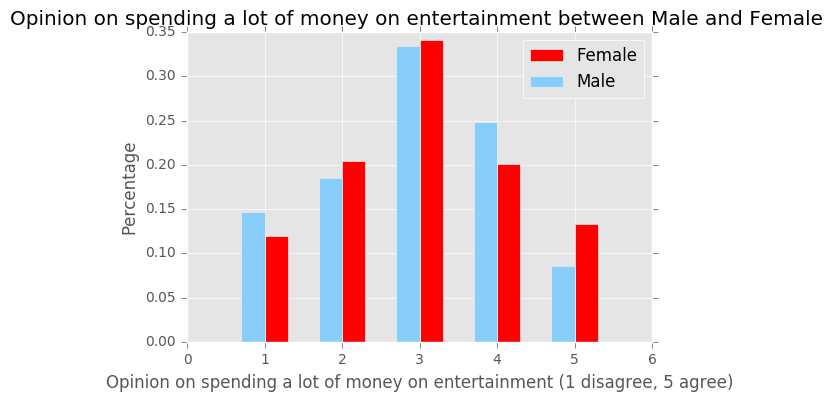

In [33]:
plt.bar(bar_locations, f_study['Entertainment spending'], bar_width, color = 'red', label = 'Female')
plt.bar(bar_locations - bar_width, m_study['Finances'], bar_width, color='lightskyblue', label = 'Male')
plt.legend(["Female", "Male"], loc = 'upper right')
plt.xlabel('Opinion on spending a lot of money on entertainment (1 disagree, 5 agree)')
plt.ylabel('Percentage')
plt.title('Opinion on spending a lot of money on entertainment between Male and Female ')
plt.show()

By percentage, 51.34% of men compared to 33.44% of women agree or disagree on spending on entertainment. This information could be particularly useful for movie theatres, concert venues, comedy clubs, and other businesses that are primarily involved in entertainment that can now potentially allocate more resources towards targeting males in their advertising of upcoming events. 

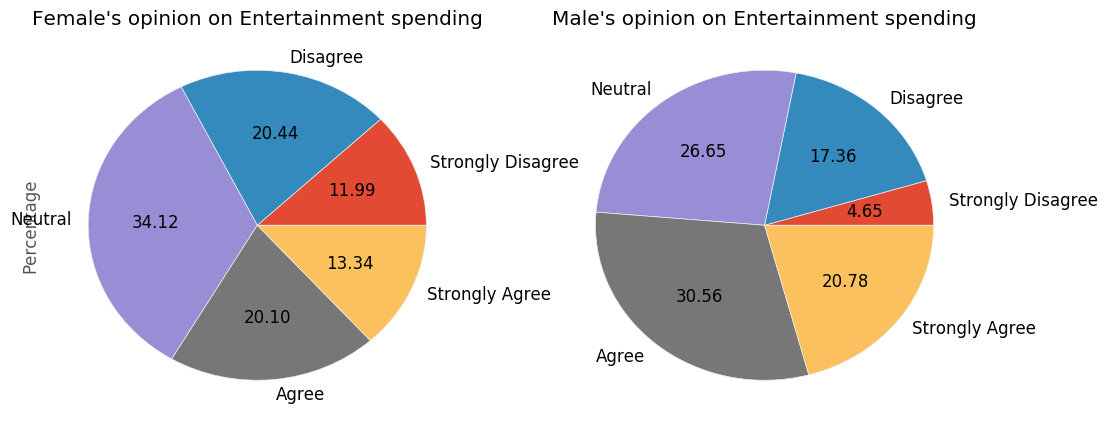

In [34]:
plt.subplot(1,2,1)
f_study['Entertainment spending'].plot.pie(labels = onefive, autopct = '%.2f', fontsize = 12, figsize = (12,5))
plt.ylabel('Percentage')
plt.title('Female\'s opinion on Entertainment spending')
plt.subplot(1,2,2)
m_study['Entertainment spending'].plot.pie(labels = onefive, autopct = '%.2f', fontsize = 12, figsize = (12,5))
plt.ylabel('')
plt.title('Male\'s opinion on Entertainment spending')
plt.show()

## Which Gender Spends More on Gadgets?

With the technology industry being one of the biggest and fastest growing industries, many technology companies may want to know who to target. Intuitively, it may seem obvious that men have a larger preference for gadgets than females, but it is important to also assess the size of the female audience. The bar graph shows us that males tend to spend more money on gadgets, but let’s take a look at the percentage breakdowns.

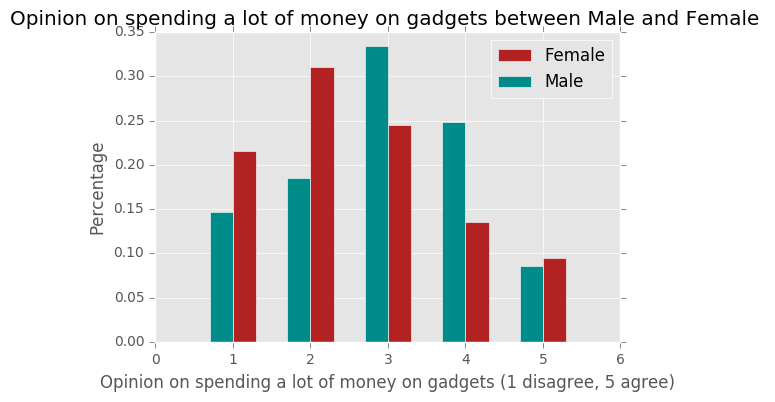

In [35]:
plt.bar(bar_locations, f_study['Spending on gadgets'], bar_width, color = 'firebrick', label = 'Female')
plt.bar(bar_locations - bar_width, m_study['Finances'], bar_width, color='darkcyan', label = 'Male')
plt.legend(["Female", "Male"], loc = 'upper right')
plt.xlabel('Opinion on spending a lot of money on gadgets (1 disagree, 5 agree)')
plt.ylabel('Percentage')
plt.title('Opinion on spending a lot of money on gadgets between Male and Female ')
plt.show()

The pie chart percentages show us that 44.77% of males and  22.93% of females agree or strongly disagree with spending on gadgets. While the male audience is indeed twice as large as the female audience, we now know that about one in five women holds a strong opinion on spending on gadgets. Companies can now be advised to spend more money on advertising to males, but to also allocate a decent amount of money to advertise gadgets to females as well. 

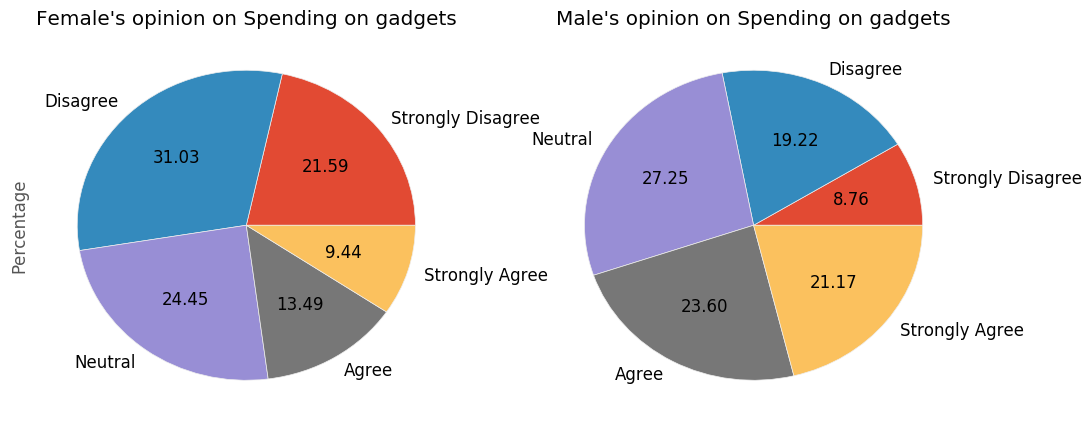

In [36]:
plt.subplot(1,2,1)
f_study['Spending on gadgets'].plot.pie(labels = onefive, autopct = '%.2f', fontsize = 12, figsize = (12,5))
plt.ylabel('Percentage')
plt.title('Female\'s opinion on Spending on gadgets')
plt.subplot(1,2,2)
m_study['Spending on gadgets'].plot.pie(labels = onefive, autopct = '%.2f', fontsize = 12, figsize = (12,5))
plt.ylabel('')
plt.title('Male\'s opinion on Spending on gadgets')
plt.show()

## Which Gender Spends More on Healthy Eating?

Finally, let’s take a look at healthy eating preferences between females and males. Our graph shows us that females are more likely to spend on healthy eat compared to males. 

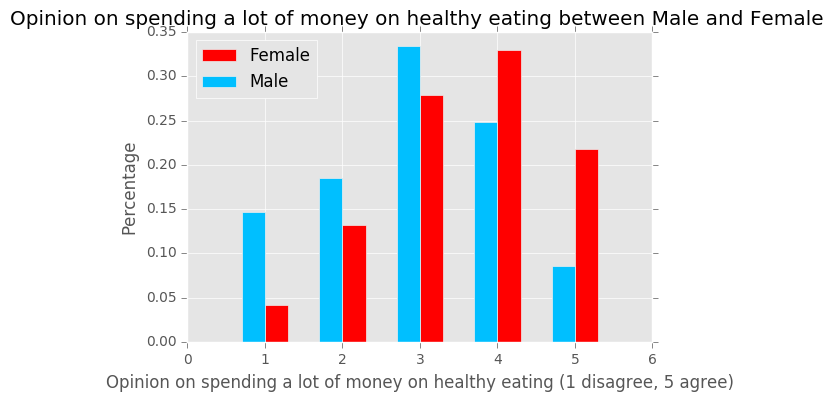

In [37]:
plt.bar(bar_locations, f_study['Spending on healthy eating'], bar_width, color = 'red', label = 'Female')
plt.bar(bar_locations - bar_width, m_study['Finances'], bar_width, color='deepskyblue', label = 'Male')
plt.legend(["Female", "Male"], loc = 'upper left')
plt.xlabel('Opinion on spending a lot of money on healthy eating (1 disagree, 5 agree)')
plt.ylabel('Percentage')
plt.title('Opinion on spending a lot of money on healthy eating between Male and Female ')
plt.show()

A further look at the breakdown of responses below tells us that 54.73% of females and 53.64% of males agree or strongly agree with spending on healthy eating. We can now advise companies to target wellness ads more towards females whether it be meal plans, athletic clothing, gadgets, etc. We will look further into the spending of healthy individuals in our next section. 

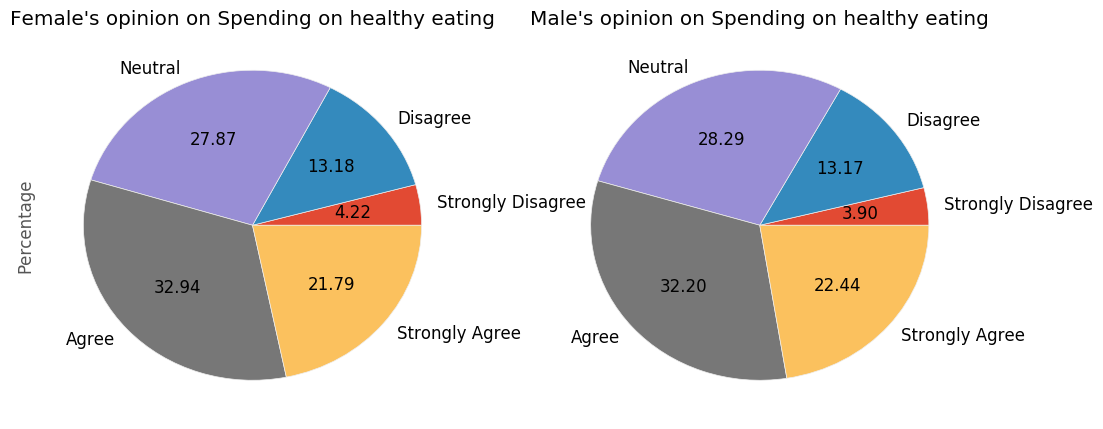

In [38]:
plt.subplot(1,2,1)
f_study['Spending on healthy eating'].plot.pie(labels = onefive, autopct = '%.2f', fontsize = 12, figsize = (12,5))
plt.ylabel('Percentage')
plt.title('Female\'s opinion on Spending on healthy eating')
plt.subplot(1,2,2)
m_study['Spending on healthy eating'].plot.pie(labels = onefive, autopct = '%.2f', fontsize = 12, figsize = (12,5))
plt.ylabel('')
plt.title('Male\'s opinion on Spending on healthy eating')
plt.show()

<h1> Health Analysis</h1>

Here we will analysis on youngster's health. For this section, we will be working extensive with the following columns:

<ul class="task-list">
<li>I live a very healthy lifestyle. - 'Healthy eating'</li>
<li>Smoking habits - 'Smoking'</li>
<li>Drinking - 'Alcohol'</li>
<li>I worry about my health - 'Health'</li>
<li>I will happily pay more money for good, quality or healthy food. - 'Spending on healthy eating'</li>
<li>Sport and leisure activities - 'Passive sport'</li>
<li>Sport at competitive level - 'Active sport'</li>
<li>Adrenaline sports - 'Adrenaline sports'</li>
</ul>

First, we will subset these columns.

In [55]:
health_an = y_data[['Healthy eating', 'Health', 'Smoking', 'Alcohol', 'Spending on healthy eating', 'Passive sport', 'Active sport', 'Adrenaline sports']]

We are going to convert the smoking and alcohol responses to numerical values. 0 being 'never' and 5 being 'a lot'
First, lets take a look at the unique responses of the 'Smoking' and 'Alcohol' section.

In [56]:
smoking_id = y_data['Smoking'].unique()
alc_id = y_data['Alcohol'].unique()
print smoking_id, '\n', alc_id

['never smoked' 'tried smoking' 'former smoker' 'current smoker' nan] 
['drink a lot' 'social drinker' 'never' nan]


In [57]:
life_dict = {'never smoked': 5, 'tried smoking': 4, 'former smoker': 2, 'current smoker': 0,'never': 5, 'social drinker': 3, 'drink a lot': 0}

Using the dictionary above, we will convert the smoking and alcohol into numeric and add these two values together. We will iterate through the y_data by rows, and then add add a column, 'Life Health', to indicate the score we give them for "How healthy they are" according to their smoking and drinking habits.

In [58]:
for index, row in health_an.iterrows():
    try:
        val = life_dict[row['Alcohol']] + life_dict[row['Smoking']]
        health_an.loc[index,'Life health'] = val
    except:
        health_an.loc[index,'Life health'] = np.nan
    

In [59]:
health_an.head()

,Healthy eating,Health,Smoking,Alcohol,Spending on healthy eating,Passive sport,Active sport,Adrenaline sports,Life health
0,4.0,1.0,never smoked,drink a lot,3.0,1.0,5.0,4.0,5.0
1,3.0,4.0,never smoked,drink a lot,2.0,1.0,1.0,2.0,5.0
2,3.0,2.0,tried smoking,drink a lot,2.0,5.0,2.0,5.0,4.0
3,3.0,1.0,former smoker,drink a lot,1.0,1.0,1.0,1.0,2.0
4,4.0,3.0,tried smoking,social drinker,4.0,3.0,1.0,2.0,7.0


Since Life Health will consist of NA if either smoking or alcohol is NA, and we can not compare it with healthy eating if either are NA, we will drop all the rows with NA in Life Health or Healthy eating

In [60]:
health_an = health_an.dropna()

In [61]:
health_an = health_an[np.isfinite(health_an['Life health'])].reset_index()
health_an = health_an[np.isfinite(health_an['Healthy eating'])].reset_index()

<strong> Now we are finished preparing for our analysis </strong>

One of the goals was to convert student's lifestyles into qualitative data that could be used for better advertising. When asked to evaluate their own health, the majority of the young people believed that they lived moderately healthy lifestyles (a score of 3 or above). This is an important starting point because the data from Figure 1 visualizes that more than half of the sample felt this way. The next objective was to split the sample into four categories based upon their response about their smoking habits. These four habits were later faceted and the results regarding their personal opinion of their health was plotted again. 

We will create a histogram on youngster's opinion on being healthy.'

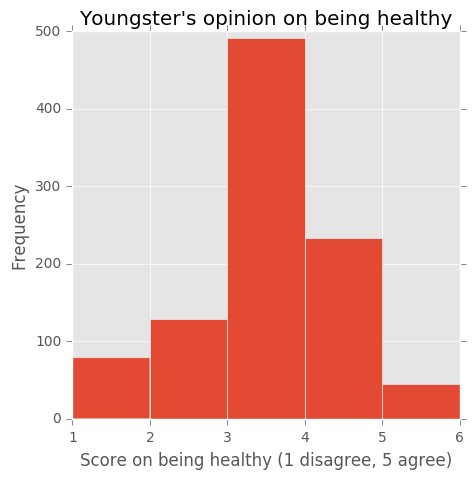

In [46]:
health_an.hist(column='Healthy eating', bins=np.arange(1, 7, 1),figsize = (5,5))
plt.xlabel('Score on being healthy (1 disagree, 5 agree)')
plt.ylabel('Frequency')
plt.title('Youngster\'s opinion on being healthy')
plt.show()

Surprisingly most of the survey correspondents were not as concerned with health and lifestyle choices and we would have expected. Because more than half off the results had an opinion of ‘3’ or moderate concern over health. This led our group to analyze whether student’s opinion on health and their own personal health scores had any sort of relationship. In the figure below,  the main area of interest were people that were worried about health (scores 3-5) and not worried about health (scores 1-2). It is hypothesized that those that have little concern over health would have worse health. There is some ambiguity in the overall results of this test, but it looks like those that did not worry about health tended to have lower health.  

Using the 'Life Health' column we created that scores the youngster's health according to their smoking and drinking habits, we will create a boxplot that compares how much the youngster worries about their health vs what we think their health habits are.

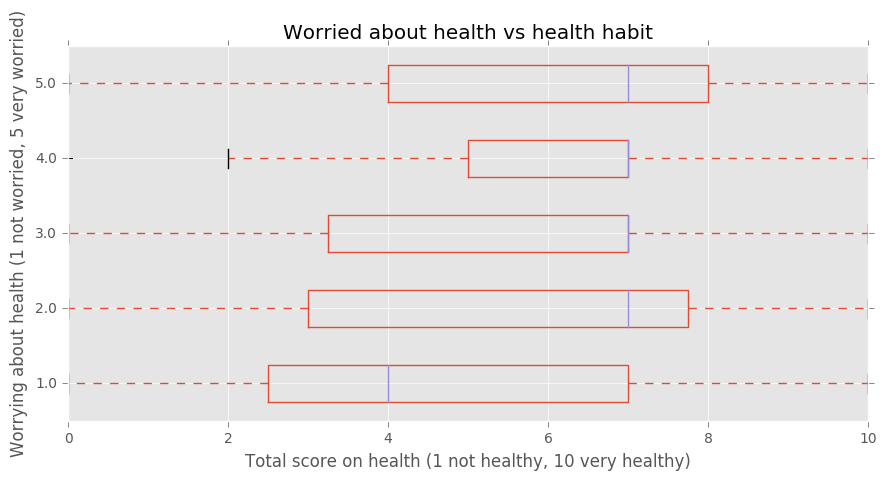

In [47]:
health_an.boxplot(column='Life health', by='Health', vert=False,figsize = (10,5))
plt.xlabel('Total score on health (1 not healthy, 10 very healthy)')
plt.ylabel('Worrying about health (1 not worried, 5 very worried)')
plt.title('Worried about health vs health habit')
plt.suptitle('')
plt.show()

According to the Center for Disease Control and Prevention, the Tobacco industry spends billions of dollars a year towards marketing and has continued to see a steady rate of cigarette purchases around the globe. The percentage of Slovakian children abusing tobacco is 23.2% for males and 23% for females. This is particularly alarming because this percentage is higher in than the average percentage of children smoking in high-income countries. 

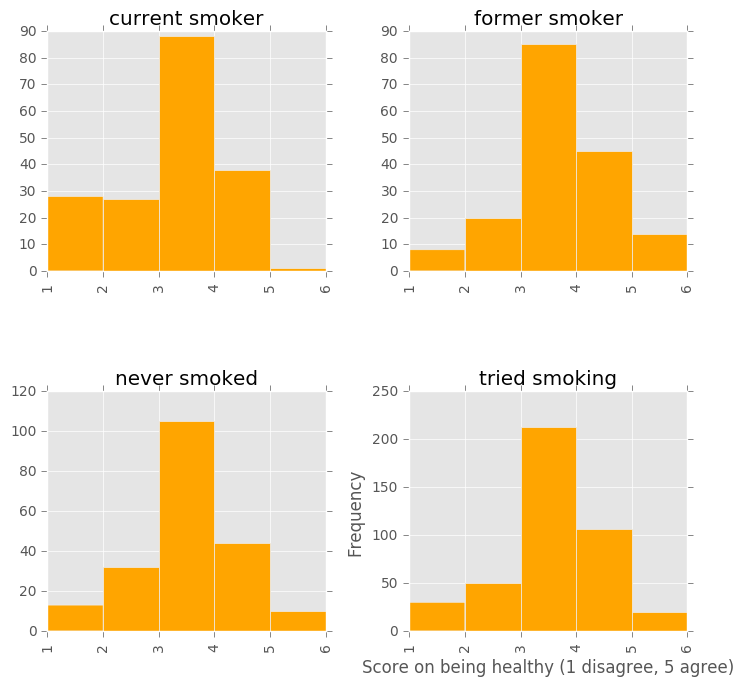

In [48]:
plt.rcParams['figure.figsize'] = (8,8)
health_an.hist(column='Healthy eating', by='Smoking', color = 'orange', bins=np.arange(1, 7, 1))
plt.ylim((0,250))
plt.xlabel('Score on being healthy (1 disagree, 5 agree)')
plt.ylabel('Frequency')
plt.show()

The first observation is that the largest group is the one where people said they had tried smoking. And similar to the combined data, all of the groups felt that they had moderate health levels of 3. However, it is important to note that for current smokers, none of them believed that they were very healthy (score of 5). Because the data could be split into two groups of smokers vs non-smokers, further research into the spending habits and personality traits of these groups was needed.

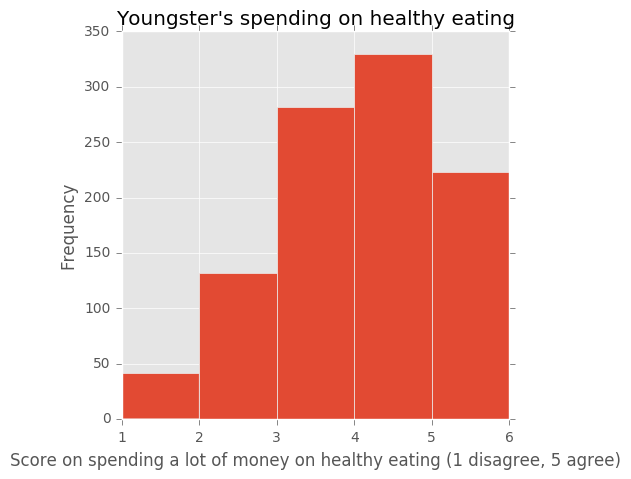

In [49]:
y_data.hist(column='Spending on healthy eating', bins=np.arange(1, 7, 1), figsize = (5,5))
plt.xlabel('Score on spending a lot of money on healthy eating (1 disagree, 5 agree)')
plt.ylabel('Frequency')
plt.title('Youngster\'s spending on healthy eating')
plt.show()

Young people’s spending habits on food was particularly interesting because food expenses are a major portion of people’s expenses. From the USDA, it was reported that in 2013 around 10% of people’s per capita disposable income was spent on food away from home or food at home. According to the figure above, it appears that this demographic is willing to spend money for healthier foods. Slightly more than 50% of the survey participants indicated they were willing to spend money on healthier types of food. 

Next, we want to look at smoker's interest in active sports. We will categorize smokers are someone who is a former smoker or current smoker and subset them

In [50]:
smokers = health_an[health_an['Smoking'].str.contains('smoker', na = False)][['Alcohol', 'Spending on healthy eating', 'Passive sport', 'Active sport']]

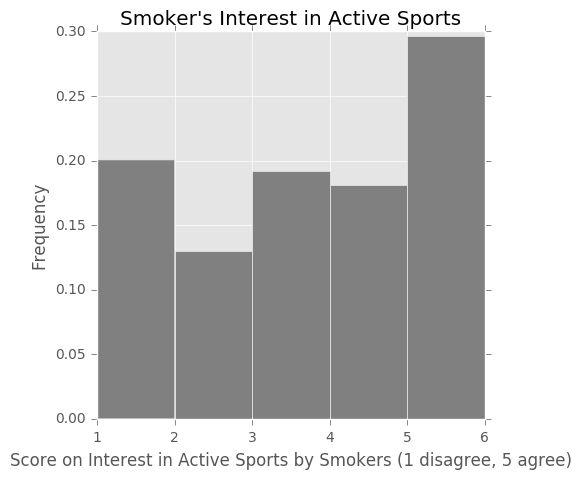

In [51]:
smokers.hist(column='Active sport', bins=np.arange(1, 7, 1), figsize = (5,5), color = 'Grey',normed = 1)
plt.xlabel('Score on Interest in Active Sports by Smokers (1 disagree, 5 agree)')
plt.ylabel('Frequency')
plt.title('Smoker\'s Interest in Active Sports')
plt.show()

From this we see that smoker’s personal interests are in athletic events. Surprisingly, major interest in sports was the response with the highest frequency. Nearly 50% of the respondents indicated an interest level of 4 or 5. This just goes to show that regardless of their personal choices, sports are an important component of their day. 

<h3> Health Interpertation </h3>

Next, we want to look at youngsters who we categorized as living a healthy life style, according to the 'Life health' Column we created based on their smoking and drinking habits. We will create a subset of these healthier youngsters.

In [52]:
health_sport = health_an[health_an['Life health'] > 6][['Passive sport','Spending on healthy eating', 'Active sport', 'Adrenaline sports']]

We will create a histogram that takes a look at this subsets and how willing are these healthier youngsters willing to spend on healthy eating.

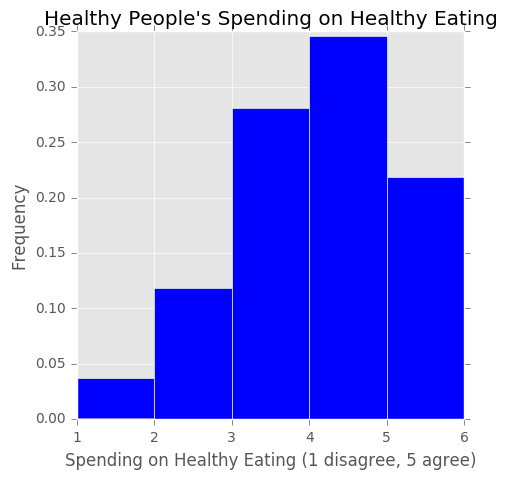

In [53]:
health_sport.hist(column='Spending on healthy eating', bins=np.arange(1, 7, 1), figsize = (5,5), color = 'Blue',normed=1)
plt.xlabel('Spending on Healthy Eating (1 disagree, 5 agree)')
plt.ylabel('Frequency')
plt.title('Healthy People\'s Spending on Healthy Eating')
plt.show()

Since the target demographic is willing to spend their income on healthier foods, there is a demand for these products. From the figures below, one can see that the willingness to spend on healthy food (scores 4 or 5) are higher for healthy people compared to smoker’s.  

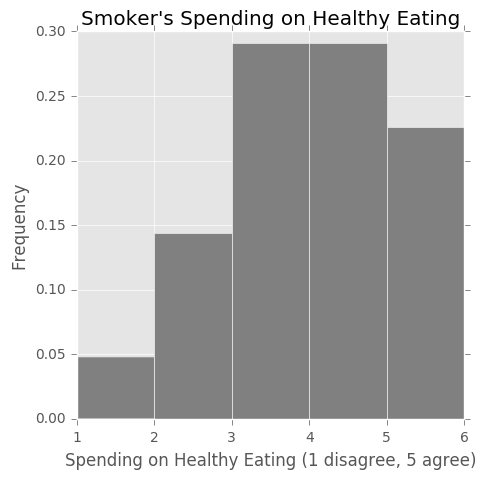

In [54]:
smokers.hist(column='Spending on healthy eating', bins=np.arange(1, 7, 1), figsize = (5,5), color = 'Grey',normed = 1)
plt.xlabel('Spending on Healthy Eating (1 disagree, 5 agree)')
plt.ylabel('Frequency')
plt.title('Smoker\'s Spending on Healthy Eating')
plt.show()

Now with this information, a business can gear advertisements towards this demographic of people. High quality grocery stores such as Whole Food could promote their products n fitness centers or athletic sporting events. This is beneficial since we learned above that the age demographic spends a large portion of their income towards food expenditures. 

While tobacco is a very controversial industry, these businesses can use the cultural information to make better advertising decision. They can spend more money towards advertising in popular Slovakian sports such as Soccer and Ice hockey. The promotion of tobacco through sports may seem counter intuitive, but the widespread cultural popularity of athletic competition may be too profitable to pass on. 